<a href="https://colab.research.google.com/github/Chrpjones/Chrpjones/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data in, take a look at it.

In [ ]:
infile="/content/311_Service_Requests_20240218.csv"

bufData=pd.read_csv(infile)

<ipython-input-11-b08a02dfd26d>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bufData=pd.read_csv(infile)


,Case Reference,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Address Number,Address Line 1,...,Neighborhood,X Coordinate,Y Coordinate,2010 Census Tract,2010 Census Block Group,2010 Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,1001988123,02/13/2024 10:38:00 AM,02/14/2024 02:49:00 PM,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,INTERSECTION,Bailey Ave,...,Seneca Babcock,1084856.800,1.046538e+06,163,2,2005,016300,36029016300,360290163002,360290163002005
1,1001988270,02/13/2024 03:19:00 PM,02/14/2024 01:05:00 PM,Closed,Dept of Public Works,Rodent_Pest Control,Rodents (Req_Serv),Property,290,SUMNER,...,Genesee-Moselle,-8773293.127,5.298197e+06,29,1,1000,002900,36029002900,360290029001,360290029001000
2,1001988178,02/13/2024 12:15:00 PM,02/14/2024 01:04:00 PM,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,32,VIRGINIA PL,...,Allentown,-8780194.135,5.296420e+06,68,2,2003,006801,36029006801,360290068011,360290068011003
3,1001988102,02/13/2024 10:06:00 AM,02/13/2024 12:54:00 PM,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,737,FERRY WEST,...,Elmwood Bryant,-8780109.316,5.299030e+06,66.02,1,1000,006602,36029006602,360290066021,360290066021001
4,1001988088,02/13/2024 09:54:00 AM,02/13/2024 02:17:00 PM,Closed,Dept of Public Works,Sanitation,Trash Ordinance Violation (Req_Serv),Property,159,IDEAL,...,Lovejoy,-8772767.978,5.295122e+06,23,2,2002,002300,36029002300,360290023002,360290023002002


Check the datatypes (this also allows me to see the column names)

In [ ]:
bufData.dtypes

Case Reference              object
Open Date                   object
Closed Date                 object
Status                      object
Subject                     object
Reason                      object
Type                        object
Object Type                 object
Address Number              object
Address Line 1              object
Address Line 2              object
City                        object
State                       object
Zipcode                     object
Property ID                 object
Location                    object
Latitude                   float64
Longitude                  float64
Council District            object
Council District 2011       object
Police District             object
Census Tract                object
Census Block Group          object
Census Block                object
Neighborhood                object
X Coordinate               float64
Y Coordinate               float64
2010 Census Tract           object
2010 Census Block Gr

Changing the date to actually be a date, this will allow me to separate the month and year.

In [ ]:
bufData['Open Date'] = pd.to_datetime(bufData['Open Date'])

Separating the months and years out from the date.

In [77]:
bufData['month'] = bufData['Open Date'].dt.month
bufData['year'] = bufData['Open Date'].dt.year
bufData.head()

,Case Reference,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Address Number,Address Line 1,...,Y Coordinate,2010 Census Tract,2010 Census Block Group,2010 Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block,month,year
0,1001988123,2024-02-13 10:38:00,02/14/2024 02:49:00 PM,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,INTERSECTION,Bailey Ave,...,1.046538e+06,163,2,2005,016300,36029016300,360290163002,360290163002005,2,2024
1,1001988270,2024-02-13 15:19:00,02/14/2024 01:05:00 PM,Closed,Dept of Public Works,Rodent_Pest Control,Rodents (Req_Serv),Property,290,SUMNER,...,5.298197e+06,29,1,1000,002900,36029002900,360290029001,360290029001000,2,2024
2,1001988178,2024-02-13 12:15:00,02/14/2024 01:04:00 PM,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,32,VIRGINIA PL,...,5.296420e+06,68,2,2003,006801,36029006801,360290068011,360290068011003,2,2024
3,1001988102,2024-02-13 10:06:00,02/13/2024 12:54:00 PM,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,737,FERRY WEST,...,5.299030e+06,66.02,1,1000,006602,36029006602,360290066021,360290066021001,2,2024
4,1001988088,2024-02-13 09:54:00,02/13/2024 02:17:00 PM,Closed,Dept of Public Works,Sanitation,Trash Ordinance Violation (Req_Serv),Property,159,IDEAL,...,5.295122e+06,23,2,2002,002300,36029002300,360290023002,360290023002002,2,2024


# Creating Plots

<Axes: xlabel='year', ylabel='count'>

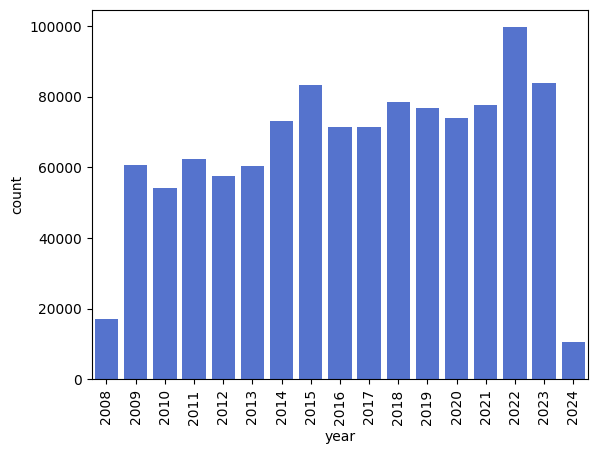

In [75]:
yearPlot = sns.countplot(x="year", data=bufData, color="royalblue")
yearPlot.tick_params(axis='x', rotation=90)
yearPlot

You can see that 311 service calls have increased over time, peaking in 2022. The lowest amount of service calls was in 2010. 2024 and 2008 were not complete years.

<Axes: xlabel='month', ylabel='count'>

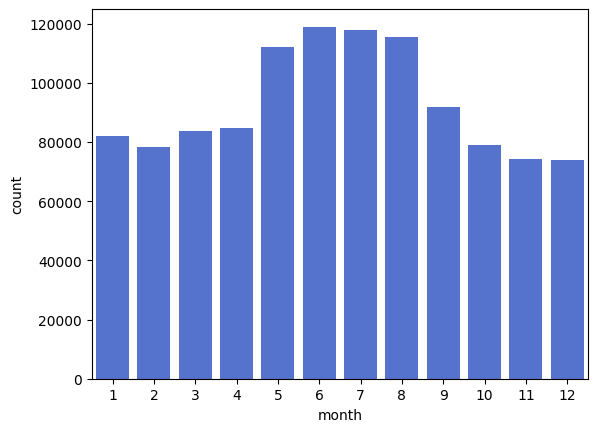

In [76]:
monthPlot = sns.countplot(x="month", data=bufData, color = "royalblue")
monthPlot.tick_params(axis='x')
monthPlot

The amount of 311 calls peak in the summer months, with the highest totals being in May, June, July and August.

# Future Ideas

One thing that could be interesting to look at would be what types of service calls change the most throughout the year, and why the summer has more calls.

In [99]:
df_plot = bufData.groupby(['Subject', 'Police District']).size().reset_index().pivot(columns='Subject', index='Police District', values=0)

<Axes: xlabel='Police District'>

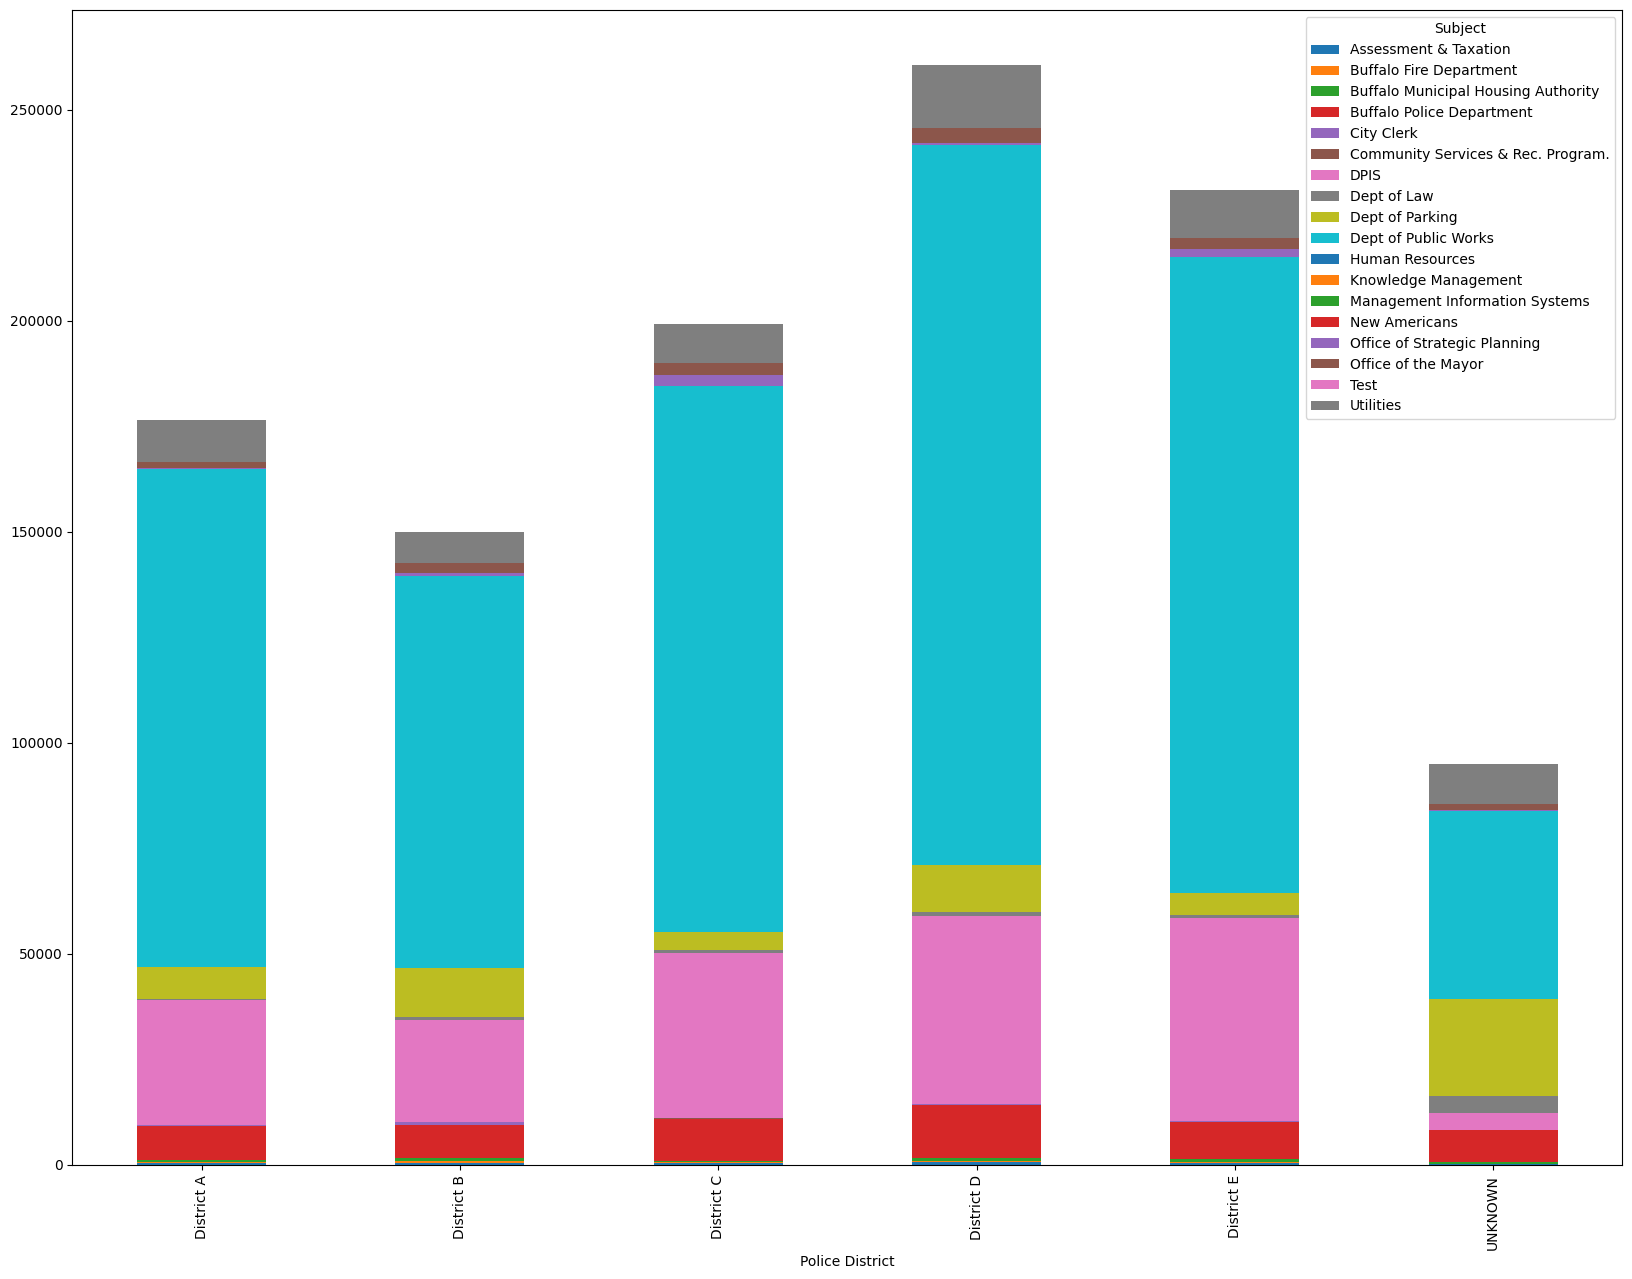

In [104]:
fig, ax = plt.subplots(figsize=(20, 15))

df_plot.plot(kind='bar', stacked=True, ax=ax)

You can see that District D has more calls to the Department of Parking. District C has the lowest to the Department of Parking.
District B has the fewest amount of 311 calls, and District D has the most.